In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce


In [2]:
df = pd.read_csv('../dataset/weatherAUS.csv')

In [3]:
print('Broj redova: {}'.format(df.shape[0]))
print('Broj kolona:{}'.format(df.shape[1]))

Broj redova: 145460
Broj kolona:23


In [4]:
df.describe(include='all')

Date  Location        MinTemp        MaxTemp       Rainfall  \
count       145460    145460  143975.000000  144199.000000  142199.000000   
unique        3436        49            NaN            NaN            NaN   
top     2013-11-12  Canberra            NaN            NaN            NaN   
freq            49      3436            NaN            NaN            NaN   
mean           NaN       NaN      12.194034      23.221348       2.360918   
std            NaN       NaN       6.398495       7.119049       8.478060   
min            NaN       NaN      -8.500000      -4.800000       0.000000   
25%            NaN       NaN       7.600000      17.900000       0.000000   
50%            NaN       NaN      12.000000      22.600000       0.000000   
75%            NaN       NaN      16.900000      28.200000       0.800000   
max            NaN       NaN      33.900000      48.100000     371.000000   

         Evaporation      Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
count   82670.000000  75625.000000      135134  135197.000000     134894  ...   
unique           NaN           NaN          16            NaN         16  ...   
top              NaN           NaN           W            NaN          N  ...   
freq             NaN           NaN        9915            NaN      11758  ...   
mean        5.468232      7.611178         NaN      40.035230        NaN  ...   
std         4.193704      3.785483         NaN      13.607062        NaN  ...   
min         0.000000      0.000000         NaN       6.000000        NaN  ...   
25%         2.600000      4.800000         NaN      31.000000        NaN  ...   
50%         4.800000      8.400000         NaN      39.000000        NaN  ...   
75%         7.400000     10.600000         NaN      48.000000        NaN  ...   
max       145.000000     14.500000         NaN     135.000000        NaN  ...   

          Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count   142806.000000  140953.000000  130395.00000  130432.000000   
unique            NaN            NaN           NaN            NaN   
top               NaN            NaN           NaN            NaN   
freq              NaN            NaN           NaN            NaN   
mean        68.880831      51.539116    1017.64994    1015.255889   
std         19.029164      20.795902       7.10653       7.037414   
min          0.000000       0.000000     980.50000     977.100000   
25%         57.000000      37.000000    1012.90000    1010.400000   
50%         70.000000      52.000000    1017.60000    1015.200000   
75%         83.000000      66.000000    1022.40000    1020.000000   
max        100.000000     100.000000    1041.00000    1039.600000   

            Cloud9am      Cloud3pm        Temp9am       Temp3pm  RainToday  \
count   89572.000000  86102.000000  143693.000000  141851.00000     142199   
unique           NaN           NaN            NaN           NaN          2   
top              NaN           NaN            NaN           NaN         No   
freq             NaN           NaN            NaN           NaN     110319   
mean        4.447461      4.509930      16.990631      21.68339        NaN   
std         2.887159      2.720357       6.488753       6.93665        NaN   
min         0.000000      0.000000      -7.200000      -5.40000        NaN   
25%         1.000000      2.000000      12.300000      16.60000        NaN   
50%         5.000000      5.000000      16.700000      21.10000        NaN   
75%         7.000000      7.000000      21.600000      26.40000        NaN   
max         9.000000      9.000000      40.200000      46.70000        NaN   

        RainTomorrow  
count         142193  
unique             2  
top               No  
freq          110316  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN  

[11 rows x 23 columns]

In [5]:
print(df['Date'].min())
print(df['Date'].max())
print(df.columns)

2007-11-01
2017-06-25
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [6]:
kategoricki = [col for col in df.columns if df[col].dtype=="object" ]
numericki = [col for col in df.columns if df[col].dtype!="object" ]

print("{} kategorickih :".format(len(kategoricki)))
print(kategoricki)

print("\n{} numerickih :".format(len(numericki)))
print(numericki)


7 kategorickih :
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

16 numerickih :
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Nedostajuce vrednosti

               Missing_Records  Percentage (%)
Sunshine                 69835       48.009762
Evaporation              62790       43.166506
Cloud3pm                 59358       40.807095
Cloud9am                 55888       38.421559
Pressure9am              15065       10.356799
Pressure3pm              15028       10.331363
WindDir9am               10566        7.263853
WindGustDir              10326        7.098859
WindGustSpeed            10263        7.055548
Humidity3pm               4507        3.098446
WindDir3pm                4228        2.906641
Temp3pm                   3609        2.481094
RainTomorrow              3267        2.245978
Rainfall                  3261        2.241853
RainToday                 3261        2.241853
WindSpeed3pm              3062        2.105046
Humidity9am               2654        1.824557
Temp9am                   1767        1.214767
WindSpeed9am              1767        1.214767
MinTemp                   1485        1.020899
MaxTemp      

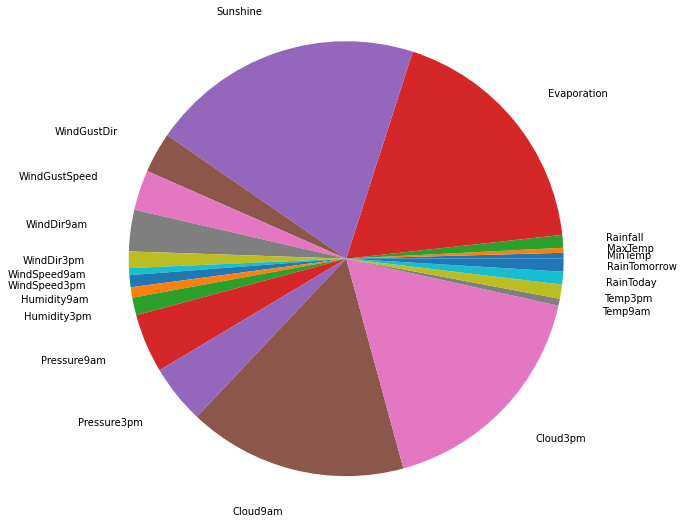

In [7]:
nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
print(nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False))
pl = plt.pie(nv[nv.Missing_Records>0]['Missing_Records'],labels = nv[nv.Missing_Records>0].axes[0],radius=2.5,labeldistance=1.2)

#plt.pie(df.isnull().sum())


In [8]:
print("{} nedostajucih vrednosti za cilj".format(df['RainTomorrow'].isnull().sum()))

3267 nedostajucih vrednosti za cilj


In [9]:
df = df[df['RainTomorrow'].notna()]
df.shape

(142193, 23)

<AxesSubplot:>

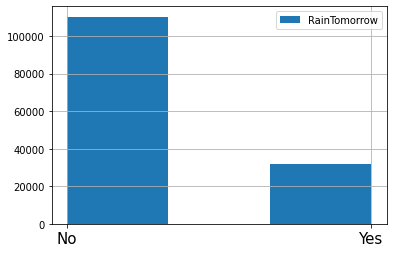

In [10]:
df['RainTomorrow'].hist(xlabelsize=15,bins=3,legend=True)


Vidimo da nije ravnomerno rasporedjeno. Balansiranje cemo se baviti u sklopu algoritama za klasifikaciju

<AxesSubplot:>

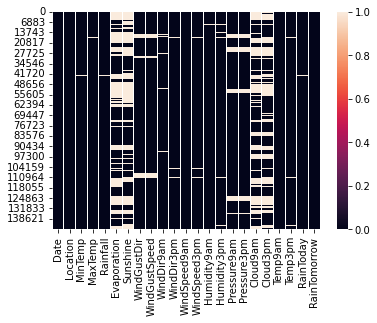

In [11]:
sns.heatmap(df.isnull())

Najvise nedostajucih vrednosti u Evaporation, Sunshine, Cloud9am and Cloud3pm. Ne mozemo da izbacimo redove koji sadrze nepoznate vrednosti.


In [12]:
print(df['Evaporation'].mean())
print(df['Sunshine'].mean())
print(df['Cloud3pm'].mean())
print(df['Cloud9am'].mean())

5.469824216349109
7.624853113193594
4.503166899728551
4.437189391885787


<AxesSubplot:>

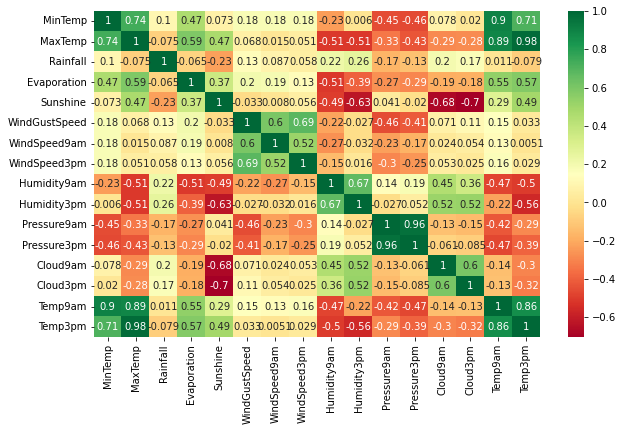

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='RdYlGn', annot=True)


In [14]:
def max_corr(column):
    print('Srednja vrednost pre dodavanja nepoznatih vrednosti {}'.format(df[column].mean()))
    index = df.corr().columns.get_loc(column)
    print(index)
    n = len(df.corr())
    corr = []
    max_corr = 0
    index_max = -1
    for i in range(n):
        if i == index:
            continue
        curr_corr = abs(df.corr().iloc[[index]].iloc[[0],[i]].max()[0])
        
        corr.append((curr_corr,i))
        
    corr.sort(reverse=True)
    max_cor = [corr[0][0],corr[1][0],corr[2][0]]
    attributes = [df.corr().columns[corr[0][1]],df.corr().columns[corr[1][1]],df.corr().columns[corr[2][1]]]
    print('Najvece korelacije {}'.format(max_cor))
    print('Atributi: {}'.format(attributes))
    print("Histogram pre dodavanja vrednosti:")
    plt.hist(df[column])
    return attributes


Evaporation

Srednja vrednost pre dodavanja nepoznatih vrednosti 5.469824216349109
3
Najvece korelacije [0.5889149209475939, 0.5742748919916016, 0.5454971048645718]
Atributi: ['MaxTemp', 'Temp3pm', 'Temp9am']
Histogram pre dodavanja vrednosti:


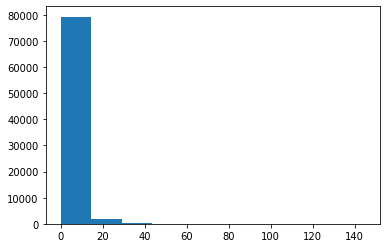

In [15]:
atr = max_corr('Evaporation')


     Vidimo da ima najvecu korelaciju sa atributima MaxTemp,Temp3pm i Temp9am

6.329457483816989
5.285297447834984
5.302343425818476
Histogram posle dodavanja vrednosti:


(array([1.38662e+05, 3.13400e+03, 2.69000e+02, 7.30000e+01, 3.70000e+01,
        9.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  14.5,  29. ,  43.5,  58. ,  72.5,  87. , 101.5, 116. ,
        130.5, 145. ]),
 <BarContainer object of 10 artists>)

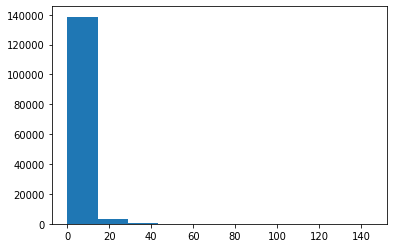

In [16]:
print(df['Evaporation'].ffill().mean())
mean =df.sort_values(by="MaxTemp")["Evaporation"].backfill().mean()
print(mean)
mean =df.sort_values(by=atr)["Evaporation"].backfill().mean()
print(mean)
df = df.sort_values(by=atr)
df["Evaporation"] = df["Evaporation"].backfill()
print("Histogram posle dodavanja vrednosti:")
plt.hist(df['Evaporation'])


Sunshine

Srednja vrednost pre dodavanja nepoznatih vrednosti 7.624853113193596
4
Najvece korelacije [0.704202458757865, 0.6756103440032457, 0.629121986291469]
Atributi: ['Cloud3pm', 'Cloud9am', 'Humidity3pm']
Histogram pre dodavanja vrednosti:


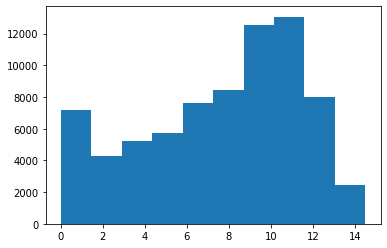

In [17]:
atr = max_corr('Sunshine')


Vidimo da ima najvecu korelaciju sa atributom Cloud3pm, CLoud9am, Humidity3pm

7.506962217406956
7.377593518577126
Histogram posle dodavanja vrednosti:


(array([16111.,  8877., 10219., 11596., 14503., 16021., 23028., 21588.,
        15234.,  5014.]),
 array([ 0.  ,  1.45,  2.9 ,  4.35,  5.8 ,  7.25,  8.7 , 10.15, 11.6 ,
        13.05, 14.5 ]),
 <BarContainer object of 10 artists>)

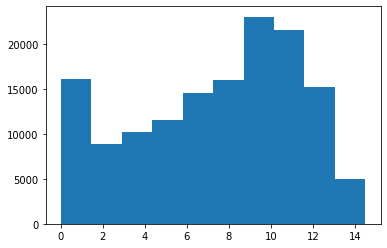

In [18]:
print(df['Sunshine'].ffill().mean())
mean =df.sort_values(by=atr)["Sunshine"].backfill().mean()
print(mean)
df = df.sort_values(by=atr)
df["Sunshine"] = df["Sunshine"].backfill()
print("Histogram posle dodavanja vrednosti:")
plt.hist(df['Sunshine'])

Cloud9am

Srednja vrednost pre dodavanja nepoznatih vrednosti 4.437189391885787
12
Najvece korelacije [0.674992571947966, 0.604117859061791, 0.5170373072868647]
Atributi: ['Sunshine', 'Cloud3pm', 'Humidity3pm']
Histogram pre dodavanja vrednosti:


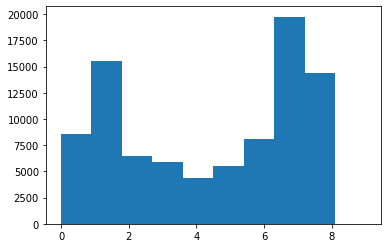

In [19]:
atr = max_corr('Cloud9am')

6.133142981722026
4.389750406143849
Histogram posle dodavanja vrednosti:


(array([1.5284e+04, 2.2380e+04, 1.1396e+04, 9.7510e+03, 9.0920e+03,
        8.3370e+03, 1.3344e+04, 2.9217e+04, 2.3388e+04, 2.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

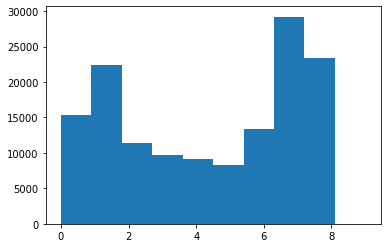

In [20]:
print(df['Cloud9am'].ffill().mean())
mean =df.sort_values(by=atr)["Cloud9am"].backfill().mean()
print(mean)
df = df.sort_values(by=atr)
df["Cloud9am"] = df["Cloud9am"].backfill()
print("Histogram posle dodavanja vrednosti:")
plt.hist(df['Cloud9am'])

Cloud3pm

Srednja vrednost pre dodavanja nepoznatih vrednosti 4.503166899728551
13
Najvece korelacije [0.7064663496672233, 0.5992209499003728, 0.5232695542903826]
Atributi: ['Sunshine', 'Cloud9am', 'Humidity3pm']
Histogram pre dodavanja vrednosti:


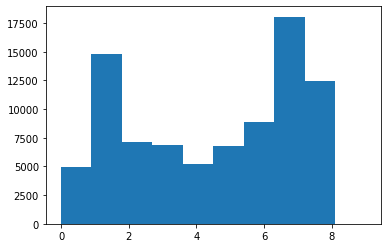

In [21]:
atr = max_corr('Cloud3pm')

5.879635425091249
4.2585114388393075
Histogram posle dodavanja vrednosti:


(array([1.2410e+04, 2.5162e+04, 1.1792e+04, 1.0983e+04, 8.7930e+03,
        1.1566e+04, 1.5225e+04, 3.0606e+04, 1.5653e+04, 1.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

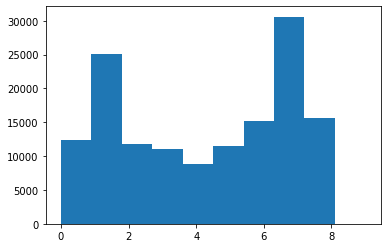

In [22]:
print(df['Cloud3pm'].ffill().mean())
mean =df.sort_values(by=atr)["Cloud3pm"].backfill().mean()
print(mean)
df = df.sort_values(by=atr)
df["Cloud3pm"] = df["Cloud3pm"].backfill()
print("Histogram posle dodavanja vrednosti:")
plt.hist(df['Cloud3pm'])

<AxesSubplot:>

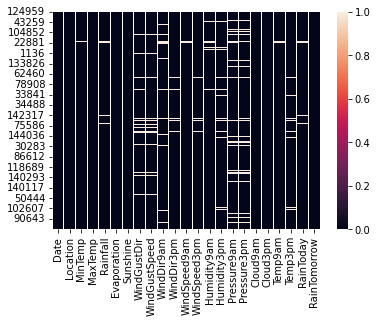

In [23]:
sns.heatmap(df.isnull())

In [24]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation          8
Sunshine             2
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am             2
Cloud3pm             2
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

<AxesSubplot:>

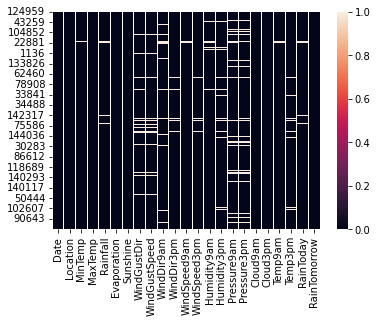

In [25]:
sns.heatmap(df.isnull())

In [26]:
for i in range(len(df.corr())):
    name = df.corr().columns[i]
    df[name] = df[name].fillna(df[name].mean())

<AxesSubplot:>

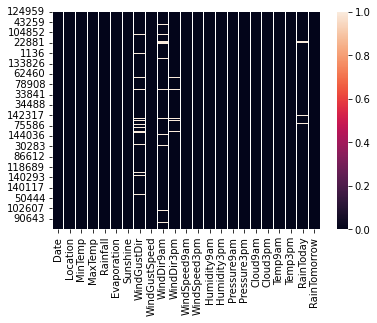

In [27]:
sns.heatmap(df.isnull())

Kategoricki atributi.
Nedostajuce vrednosti cemo zameniti najcescim pojavljivanjem 

In [28]:
category_columns = [col for col in df.columns if df[col].dtype=="object" ]
for col in category_columns:
     df[col].fillna(df[col].mode()[0], inplace=True)
        

In [29]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

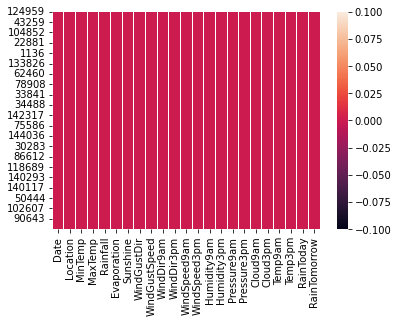

In [30]:
sns.heatmap(df.isnull())

In [31]:
df.shape

(142193, 23)

Enkodiranje

In [32]:
df['Date']= pd.to_datetime(df['Date']) 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day



#Dropping the date column
df.drop('Date', axis=1, inplace = True)

df.replace('Yes',1, inplace=True)
df.replace('No', 0, inplace=True)


In [33]:
df.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  142193.000000  142193.000000  142193.000000  142193.000000   
mean       12.186400      23.226784       2.349974       5.302343   
std         6.388924       7.109554       8.423217       4.147637   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.600000      17.900000       0.000000       2.400000   
50%        12.000000      22.700000       0.000000       4.400000   
75%        16.800000      28.200000       0.800000       7.200000   
max        33.900000      48.100000     371.000000     145.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  142193.000000  142193.000000  142193.000000  142193.000000   
mean        7.377594      39.984292      14.001988      18.637576   
std         3.898898      13.138385       8.851082       8.721551   
min         0.000000       6.000000       0.000000       0.000000   
25%         4.400000      31.000000       7.000000      13.000000   
50%         8.100000      39.000000      13.000000      18.637576   
75%        10.500000      46.000000      19.000000      24.000000   
max        14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm  ...    Pressure3pm       Cloud9am  \
count  142193.000000  142193.000000  ...  142193.000000  142193.000000   
mean       68.843810      51.482606  ...    1015.258204       4.389750   
std        18.932077      20.532065  ...       6.681788       2.879055   
min         0.000000       0.000000  ...     977.100000       0.000000   
25%        57.000000      37.000000  ...    1011.000000       1.000000   
50%        70.000000      51.482606  ...    1015.258204       5.000000   
75%        83.000000      65.000000  ...    1019.400000       7.000000   
max       100.000000     100.000000  ...    1039.600000       9.000000   

            Cloud3pm        Temp9am        Temp3pm      RainToday  \
count  142193.000000  142193.000000  142193.000000  142193.000000   
mean        4.258511      16.987509      21.687235       0.221213   
std         2.745819       6.472166       6.870771       0.415065   
min         0.000000      -7.200000      -5.400000       0.000000   
25%         1.000000      12.300000      16.700000       0.000000   
50%         5.000000      16.800000      21.300000       0.000000   
75%         7.000000      21.500000      26.300000       0.000000   
max         9.000000      40.200000      46.700000       1.000000   

        RainTomorrow           Year          Month            Day  
count  142193.000000  142193.000000  142193.000000  142193.000000  
mean        0.224181    2012.758926       6.402544      15.715084  
std         0.417043       2.541256       3.426506       8.798150  
min         0.000000    2007.000000       1.000000       1.000000  
25%         0.000000    2011.000000       3.000000       8.000000  
50%         0.000000    2013.000000       6.000000      16.000000  
75%         0.000000    2015.000000       9.000000      23.000000  
max         1.000000    2017.000000      12.000000      31.000000  

[8 rows x 21 columns]

In [34]:
print(df['WindDir3pm'].unique())
print(df['WindDir9am'].unique())
print(df['WindGustDir'].unique())
print(df['Location'].unique())

['NNW' 'SE' 'NW' 'WNW' 'E' 'N' 'S' 'SSE' 'ESE' 'NE' 'WSW' 'ENE' 'NNE' 'W'
 'SW' 'SSW']
['N' 'E' 'NW' 'NNE' 'NE' 'ESE' 'SSW' 'SSE' 'S' 'W' 'SE' 'WNW' 'ENE' 'SW'
 'WSW' 'NNW']
['N' 'SE' 'WSW' 'NNE' 'WNW' 'E' 'ENE' 'W' 'ESE' 'NNW' 'S' 'SSE' 'SSW' 'NW'
 'SW' 'NE']
['SalmonGums' 'Woomera' 'Uluru' 'Ballarat' 'Cobar' 'Moree' 'Tuggeranong'
 'Adelaide' 'Nhil' 'Canberra' 'Wollongong' 'Richmond' 'Penrith'
 'MountGinini' 'NorahHead' 'Albury' 'Portland' 'WaggaWagga' 'Bendigo'
 'BadgerysCreek' 'Dartmoor' 'Sale' 'Newcastle' 'Launceston' 'PearceRAAF'
 'GoldCoast' 'Perth' 'MountGambier' 'NorfolkIsland' 'SydneyAirport'
 'Sydney' 'CoffsHarbour' 'Darwin' 'Brisbane' 'Hobart' 'Williamtown'
 'Melbourne' 'Albany' 'AliceSprings' 'MelbourneAirport' 'Watsonia'
 'Nuriootpa' 'PerthAirport' 'Mildura' 'Witchcliffe' 'Walpole' 'Cairns'
 'Townsville' 'Katherine']


In [35]:
mapping = {'N':1, 'NNE':2, 'NE':3,'ENE':4, 'E':5,'ESE':6,'SE':7,'SSE':8, 'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,
          'W':15,'WNW':16,'NW':17,'NNW':18}

df['WindDir3pm'] =df['WindDir3pm'].map(mapping)
df['WindDir9am'] = df['WindDir9am'].map(mapping)
df['WindGustDir'] =df['WindGustDir'].map(mapping)

print(df['WindDir3pm'].unique())
print(df['WindDir9am'].unique())
print(df['WindGustDir'].unique())
print(df['Location'].unique())

feature_names = df.columns
df.shape

[18  7 17 16  5  1  9  8  6  3 12  4  2 15 11 10]
[ 1  5 17  2  3  6 10  8  9 15  7 16  4 11 12 18]
[ 1  7 12  2 16  5  4 15  6 18  9  8 10 17 11  3]
['SalmonGums' 'Woomera' 'Uluru' 'Ballarat' 'Cobar' 'Moree' 'Tuggeranong'
 'Adelaide' 'Nhil' 'Canberra' 'Wollongong' 'Richmond' 'Penrith'
 'MountGinini' 'NorahHead' 'Albury' 'Portland' 'WaggaWagga' 'Bendigo'
 'BadgerysCreek' 'Dartmoor' 'Sale' 'Newcastle' 'Launceston' 'PearceRAAF'
 'GoldCoast' 'Perth' 'MountGambier' 'NorfolkIsland' 'SydneyAirport'
 'Sydney' 'CoffsHarbour' 'Darwin' 'Brisbane' 'Hobart' 'Williamtown'
 'Melbourne' 'Albany' 'AliceSprings' 'MelbourneAirport' 'Watsonia'
 'Nuriootpa' 'PerthAirport' 'Mildura' 'Witchcliffe' 'Walpole' 'Cairns'
 'Townsville' 'Katherine']


(142193, 25)

In [36]:
encoder = ce.TargetEncoder(cols=['Location'])
data_encoded = encoder.fit_transform(df['Location'],df['RainToday'])
df['Location'] = data_encoded

In [37]:
print(df['Location'].unique())


[0.15871404 0.06722408 0.07429323 0.25693527 0.12851406 0.13384723
 0.18745831 0.21877023 0.15296367 0.1825629  0.23600402 0.18807184
 0.19601889 0.26866185 0.27142369 0.20425108 0.36315087 0.17909946
 0.18523401 0.19535519 0.31294597 0.21366667 0.24399323 0.23018494
 0.17161477 0.25402685 0.20200438 0.30330033 0.30769231 0.25690516
 0.25951453 0.29292245 0.26691729 0.22271433 0.23902133 0.24872699
 0.23819302 0.29608753 0.07951171 0.21701562 0.24474825 0.19586942
 0.1884347  0.1084137  0.2950542  0.32919475 0.31492637 0.170788
 0.16484926]


#moguce preprilagodjavanje

In [38]:
df.drop('Day', axis=1,inplace=True)
df.drop('Year',axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='RdYlGn', annot=True)


Feature selection.
Izbacujemo atribure koji imaju veliku medjusobnu korelaciju

In [ ]:
threshold = 0.70
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df = df.drop(df[to_drop], axis=1)

In [ ]:
print(df.shape)
df.columns

In [ ]:
df.to_csv("../dataset/weatherClean.csv",index=False)